Hmrk 3

In [2]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd


import gensim.downloader as api
word_vectors =  "/Users/alilashgari/Desktop/Desktop/STAT 766 (Fall 2022)/hw2/GoogleNews-vectors-negative300.bin/GoogleNews-vectors-negative300.bin"


# vocab = list(word_vectors.index_to_key)

Problem 1 Part 1:

In [12]:
from nltk.tokenize import RegexpTokenizer
#'No banks to deposit money near the river bank'
tokenizer = RegexpTokenizer(r'\w+')
List1= 'No banks to deposit money near the river bank'
sent1 = {}
tokenl1 = tokenizer.tokenize(List1)

for i in tokenl1:
    if i in vocab:
        sent1[i] = (word_vectors.most_similar(i))
#print(sent1)
pd1 = pd.DataFrame(sent1)


#Stick to the rule by stirring with a wood stick
List2='Stick to the rule by stirring with a wood stick'
sent2 = {}
tokenl2 = tokenizer.tokenize(List2)
for i in tokenl2:
    if i in vocab:
        sent2[i] = (word_vectors.most_similar(i))
pd2 = pd.DataFrame(sent2)

pd1.to_csv('sentence1_most_similar.csv', sep='~')
pd2.to_csv('sentence2_most_similar.csv', sep='~')
# to and a were not in the vocabulary
print(pd1)

                              No                                   banks  \
0       (no, 0.7029597759246826)              (bank, 0.7440758347511292)   
1   (Nobody, 0.6824341416358948)            (lenders, 0.660046398639679)   
2      (None, 0.608828604221344)           (banking, 0.6438172459602356)   
3  (Nothing, 0.5618352293968201)  (mortgage_lenders, 0.6358486413955688)   
4   (nobody, 0.5327647924423218)         (megabanks, 0.6172765493392944)   
5      (Not, 0.5226895809173584)      (institutions, 0.6150783896446228)   
6      (any, 0.5202820897102356)        (brokerages, 0.6133029460906982)   
7  (Neither, 0.5181751847267151)            (lender, 0.6090298295021057)   
8   (Hardly, 0.5112018585205078)        (depositors, 0.6050993204116821)   
9     (Nope, 0.5034330487251282)             (Banks, 0.6024675369262695)   

                                             deposit  \
0                     (deposits, 0.8111314177513123)   
1                      (Deposit, 0.7686398029327393

Problem 1 Part 2:

In [3]:


#‘better:good :: worse: x
q1_2_1 = word_vectors.most_similar(positive=['worse', 'good'], negative=['better'])
#U.S.:dollar :: China: x
q1_2_2 = word_vectors.most_similar(positive=['China', 'dollar'], negative=['U.S.'])

print(q1_2_1)
print(q1_2_2)
ques1_2 = pd.DataFrame( {'q1_2_1':q1_2_1, 'q1_2_2':q1_2_2})
import csv
ques1_2.to_csv('ques1_2.csv', sep='~')

AttributeError: 'str' object has no attribute 'most_similar'

Problem 1 Part 3:


In [14]:

from gensim.models import word2vec
import numpy as np
import gensim.downloader as api


wordlist =['Rome','Italy','ball','worse']
def get_word2vec_matrix( words_list ):
    #import gensim.downloader as api
    notexist = []
    m = np.empty((300,0))
    word2ind = {}
    word_vectors = api.load("word2vec-google-news-300")
    words_list.sort()
    count = 0
    for word in words_list:
        try:
            vec = word_vectors.get_vector(word)
        except KeyError:
            #print(word)
            notexist.append(word)
        else:
            m = np.c_[m,vec]
            word2ind[word] = count
            count = count +1
    m = np.transpose(m)
    return  m, word2ind, notexist

get_word2vec_matrix(wordlist)


(array([[ 0.05786133,  0.13671875,  0.16992188, ..., -0.11425781,
          0.07861328, -0.14453125],
        [ 0.23535156,  0.18652344, -0.0390625 , ..., -0.16894531,
          0.08447266, -0.00430298],
        [-0.01428223,  0.02648926,  0.03735352, ..., -0.10791016,
         -0.25585938,  0.12060547],
        [-0.00448608, -0.12451172,  0.0004425 , ...,  0.04882812,
          0.06738281,  0.19238281]]),
 {'Italy': 0, 'Rome': 1, 'ball': 2, 'worse': 3},
 [])

Problem 1 part 4


In [15]:

from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

#preprocessing
prelist = 'A large oil spill off the southern California coast was described as an “environmental catastrophe" by the mayor of Huntington Beach on Sunday, as the breach of an oil rig pipeline left dead fish and birds strewn on the sand and offshore wetlands clogged with oil. An estimated 126,000 gallons, or 3,000 barrels, had spread into an oil slick covering about 13 square miles of the Pacific Ocean since it was first reported on Saturday morning, said the mayor of Huntington Beach, at a press conference. The beachside city, about 40 miles south of Los Angeles, was bearing the brunt of the spill.'
wordlist = prelist.lower()
stopwords = stopwords.words('english')
#remove after converting to lower case
tokenizer = RegexpTokenizer(r'\w+')
newwords = tokenizer.tokenize(str(wordlist))
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
newwords = tokenizer.tokenize(str(wordlist))

new_tokens = []
for word in newwords:
    if word not in stopwords:
        new_tokens.append(word)
new_tokens.sort()

#getting unique words
unique = []
for word in new_tokens:
    if word not in unique:
        unique.append(word)
#print(unique)


Mat, word2Ind, non_exist = get_word2vec_matrix(unique)
pd.DataFrame(Mat).to_csv('M_word2vec.csv',
header=False, index=False )
ques1_4 = { 'word2Ind':word2Ind, 'non_exist':non_exist}
word2Ind

print(Mat)
print(word2Ind)
print(non_exist)

[[-6.07910156e-02 -3.36914062e-02  6.93359375e-02 ... -2.73437500e-02
  -1.68457031e-02  2.30468750e-01]
 [-4.37500000e-01  7.66601562e-02  3.16406250e-01 ... -1.96289062e-01
   4.94140625e-01 -7.17773438e-02]
 [ 1.93359375e-01  4.99725342e-04 -1.39648438e-01 ... -9.42382812e-02
   1.61132812e-02  1.64794922e-02]
 ...
 [ 3.08593750e-01  9.22851562e-02 -1.03027344e-01 ... -4.41406250e-01
  -9.91210938e-02 -2.58789062e-02]
 [-5.32226562e-02 -4.11987305e-04  3.36914062e-02 ... -2.37304688e-01
  -1.70898438e-01  2.33154297e-02]
 [ 1.53320312e-01  2.33398438e-01  2.21679688e-01 ... -4.04296875e-01
   3.59375000e-01 -1.70898438e-01]]
{'angeles': 0, 'barrels': 1, 'beach': 2, 'beachside': 3, 'bearing': 4, 'birds': 5, 'breach': 6, 'brunt': 7, 'california': 8, 'catastrophe': 9, 'city': 10, 'clogged': 11, 'coast': 12, 'conference': 13, 'covering': 14, 'dead': 15, 'described': 16, 'environmental': 17, 'estimated': 18, 'first': 19, 'fish': 20, 'gallons': 21, 'huntington': 22, 'large': 23, 'left': 2

Problem 1 Part 5

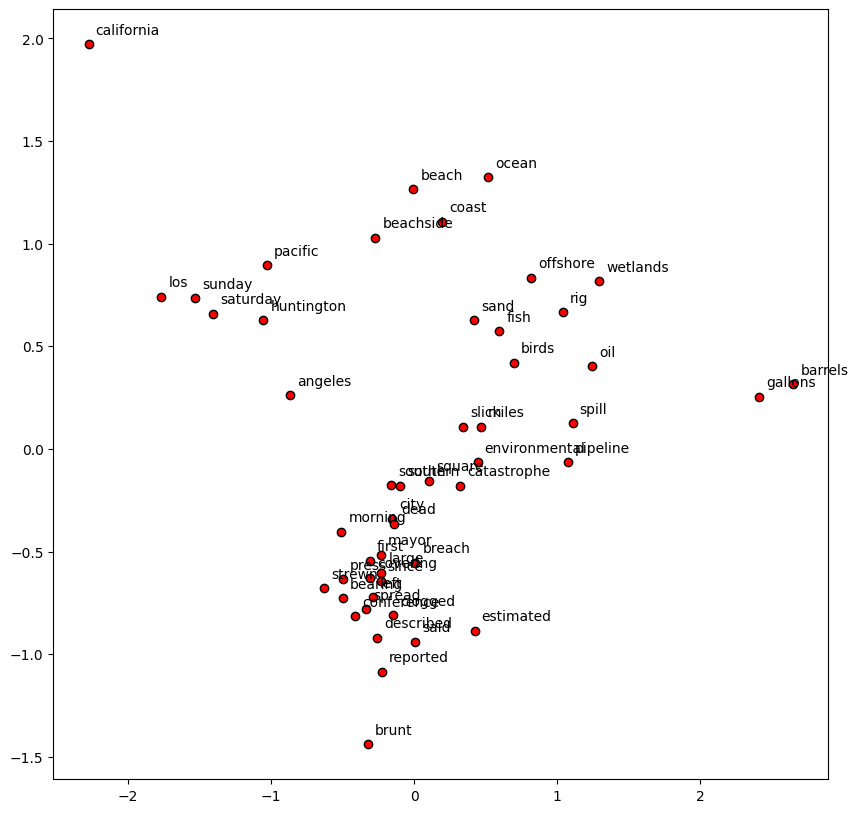

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
M2d_word2vec=PCA().fit_transform(Mat)[:,:2]
#M2d_word2vec
pd.DataFrame(M2d_word2vec).to_csv('M2d_word2vec.csv',
header=False, index=False )
plt.figure(figsize=(10,10))
plt.scatter(M2d_word2vec[:,0], M2d_word2vec[:,1], edgecolors='k', c='r')
for word, (x,y) in zip(unique, M2d_word2vec):
    plt.text(x+0.05, y+0.05, word)
plt.savefig('figQ1p5')

Problem 1 part 6 
Reapeat parts 3 4 5 with glove
#################################
Part 6-(3)

In [5]:
from gensim.test.utils import get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords



wordlist =['rome','italy','ball','worse','a','iksdfhs']

def get_glove_matrix(words_list):
    path = 'C:/Users/nickm/OneDrive/Desktop/wikidownload/glove.6B.300d.txt'
    # locate the temporary path to put converted glove vectors
    glove_tmp_path = get_tmpfile("glove.6B.300d.word2vec.txt")
    glove2word2vec(path, glove_tmp_path) #output a (400001, 300) matrix
    word_vectorsG = KeyedVectors.load_word2vec_format(glove_tmp_path )
    notexist = []
    m = np.empty((300,0))
    word2ind = {}
    words_list.sort()
    count = 0
    for word in words_list:
        try:
            vec = word_vectorsG.get_vector(word)
        except KeyError:
            #print(word)
            notexist.append(word)
        else: 
            m = np.c_[m,vec]
            word2ind[word] = count
            count = count +1
    m = np.transpose(m)

    return  m, word2ind, notexist

get_glove_matrix(wordlist)

C:\Users\nickm\AppData\Local\Temp\ipykernel_16980\203176074.py:17: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(path, glove_tmp_path) #output a (400001, 300) matrix


(array([[-0.29712   ,  0.094049  , -0.096662  , ...,  0.059717  ,
         -0.22853   ,  0.29602   ],
        [-0.22694001,  0.47336   , -0.11235   , ..., -0.59364998,
          0.27687001, -0.52739   ],
        [ 0.032153  ,  0.41639   , -0.41593999, ..., -0.51203001,
         -0.0030393 , -0.56418997],
        [ 0.15579   , -0.12682   ,  0.039515  , ..., -0.048609  ,
         -0.64297003, -0.42662999],
        [ 0.064152  , -0.029709  ,  0.11545   , ..., -0.21717   ,
          0.13479   ,  0.057202  ]]),
 {'a': 0, 'ball': 1, 'italy': 2, 'rome': 3, 'worse': 4},
 ['iksdfhs'])

Problem1 part 6 - (4)

In [306]:

from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
#preprocessing
prelist = 'A large oil spill off the southern California coast was described as an “environmental catastrophe" by the mayor of Huntington Beach on Sunday, as the breach of an oil rig pipeline left dead fish and birds strewn on the sand and offshore wetlands clogged with oil. An estimated 126,000 gallons, or 3,000 barrels, had spread into an oil slick covering about 13 square miles of the Pacific Ocean since it was first reported on Saturday morning, said the mayor of Huntington Beach, at a press conference. The beachside city, about 40 miles south of Los Angeles, was bearing the brunt of the spill.'
wordlist = prelist.lower()
stopwords = stopwords.words('english')
#remove after converting to lower case
tokenizer = RegexpTokenizer(r'\w+')
newwords = tokenizer.tokenize(str(wordlist))
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
newwords = tokenizer.tokenize(str(wordlist))

new_tokens_g = []
for word in newwords:
    if word not in stopwords:
        new_tokens_g.append(word)
new_tokens_g.sort()

#getting unique words
unique_G = []
for word in new_tokens_g:
    if word not in unique_G:
        unique_G.append(word)

mat2, word2Ind2, non_exist2 = get_glove_matrix(unique_G) 
pd.DataFrame(mat2).to_csv('M_glove.csv',
header=False, index=False )
ques1_4_glove = { 'word2Ind':word2Ind2, 'non_exist':non_exist2}




C:\Users\nickm\AppData\Local\Temp\ipykernel_28436\203176074.py:17: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(path, glove_tmp_path) #output a (400001, 300) matrix


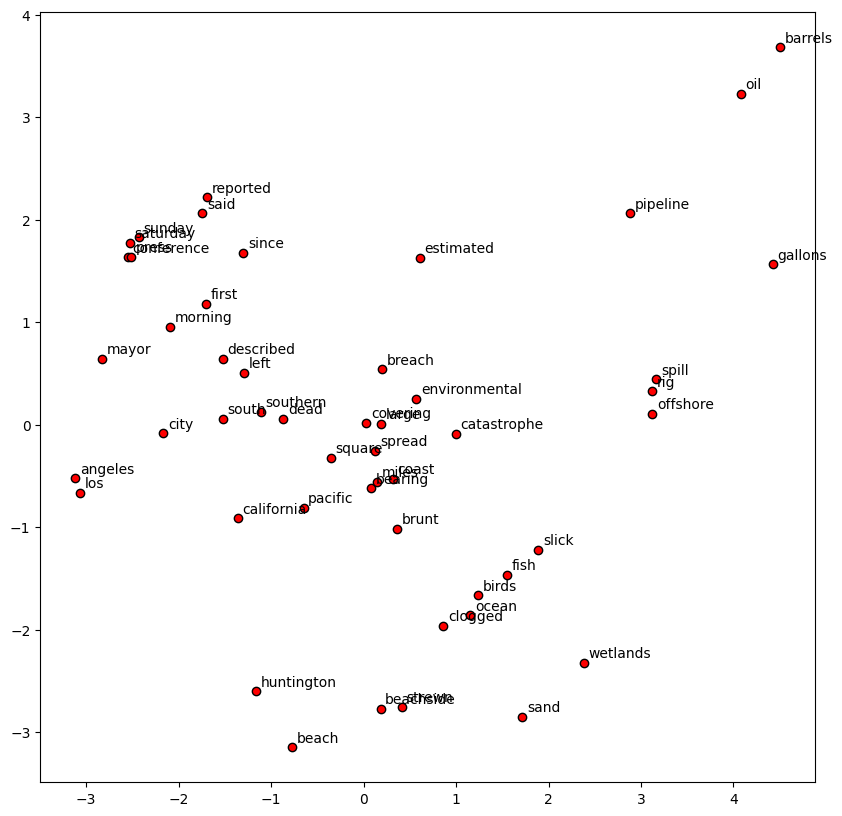

In [315]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
M2d_glove=PCA().fit_transform(mat2)[:,:2]
pd.DataFrame(M2d_glove).to_csv('M2d_glove.csv', header=False, index=False )
plt.figure(figsize=(10,10))
plt.scatter(M2d_glove[:,0], M2d_glove[:,1], edgecolors='k', c='r')
for word, (x,y) in zip(unique_G, M2d_glove):
    plt.text(x+0.05, y+0.05, word)


Problem 1 part 7 -3

In [30]:
wordlist =['rome','italy','ball','worse','a','iksdfhs']
def get_fasttext(words_list, training_text):
    from gensim.models import FastText
    words_list.sort()
    word_vectors = open('C:/Users/nickm/OneDrive/Desktop/wikidownload/wiki-news-300d-1M.vec',encoding = 'utf-8',newline = '\n', errors='ignore')
    word_vec_v2 = {}
    for line in word_vectors:
        wrd_vec = line.strip().rsplit(' ')
        wrd_value = wrd_vec[0]
        vec = [float(nvec) for nvec in wrd_vec[1:]]
        word_vec_v2[wrd_value] = vec
    import numpy as np
    m = np.empty((300,0))
    word2ind = {}
    m_new = np.empty((300,0))
    word2ind_new = {}
    model = FastText(vector_size=300)
    model.build_vocab(training_text)
    model.train(training_text, epochs=model.epochs,total_examples=model.corpus_count, total_words= model.corpus_total_words)
    indcount = 0
    indnewcount = 0
    for word in words_list:
        if word in word_vec_v2:
            m = np.c_[m,word_vec_v2[word]]
            word2ind[word] = indcount
            indcount = indcount + 1
        else:
            m_new = np.c_[m_new,model.wv[word]]
            word2ind_new[word] = indnewcount
            indnewcount = indnewcount + 1
    m = np.transpose(m)
    m_new = np.transpose(m_new)
    return m,word2ind, m_new,word2ind_new



get_fasttext(wordlist, prelist)
        


(array([[ 0.0047,  0.0223, -0.0087, ...,  0.1479,  0.1324, -0.0318],
        [-0.1383,  0.0909, -0.0629, ...,  0.099 ,  0.1217, -0.0467],
        [-0.0361,  0.0956,  0.154 , ...,  0.0311,  0.1617, -0.0261],
        [ 0.0423,  0.1911,  0.0668, ...,  0.0363, -0.005 ,  0.0997],
        [ 0.1105, -0.1347, -0.0261, ...,  0.225 ,  0.1841, -0.0009]]),
 {'a': 0, 'ball': 1, 'italy': 2, 'rome': 3, 'worse': 4},
 array([[-1.13869144e-03,  8.60093351e-05, -2.49573670e-04,
          3.59961181e-04,  5.75568003e-04, -2.17944780e-05,
         -6.77649572e-04, -1.17899195e-04,  2.51807593e-04,
          1.03424230e-04,  4.52507637e-04, -1.82147760e-05,
          5.85064641e-04,  4.32411936e-04,  1.53420522e-04,
         -3.66116787e-04, -1.44978942e-04,  5.74156817e-04,
         -3.78820259e-05, -1.66700323e-04, -3.07534869e-08,
          2.48647208e-04, -2.06458426e-04, -3.52682218e-05,
          2.06482277e-04, -4.64176963e-04, -4.00004821e-04,
          8.79213694e-05,  3.60947364e-04,  2.22600022e-

Problem 1 part 7 -4

In [223]:

from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
#preprocessing
prelist = 'A large oil spill off the southern California coast was described as an “environmental catastrophe" by the mayor of Huntington Beach on Sunday, as the breach of an oil rig pipeline left dead fish and birds strewn on the sand and offshore wetlands clogged with oil. An estimated 126,000 gallons, or 3,000 barrels, had spread into an oil slick covering about 13 square miles of the Pacific Ocean since it was first reported on Saturday morning, said the mayor of Huntington Beach, at a press conference. The beachside city, about 40 miles south of Los Angeles, was bearing the brunt of the spill.'
wordlist = prelist.lower()
stopwords = stopwords.words('english')
#remove after converting to lower case
tokenizer = RegexpTokenizer(r'\w+')
newwords = tokenizer.tokenize(str(wordlist))
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
newwords = tokenizer.tokenize(str(wordlist))

new_tokens_f = []
for word in newwords:
    if word not in stopwords:
        new_tokens_f.append(word)
new_tokens_f.sort()

#getting unique words
unique_f = []
for word in new_tokens_f:
    if word not in unique_f:
        unique_f.append(word)



mat3, wordind, m_new, wordind_new = get_fasttext(unique_f, prelist)

pd.DataFrame(mat3).to_csv('M_fasttext.csv',
header=False, index=False )
ques1_4_fasttext = {'word2Ind':wordind,'word2Ind_new':wordind_new}

{}

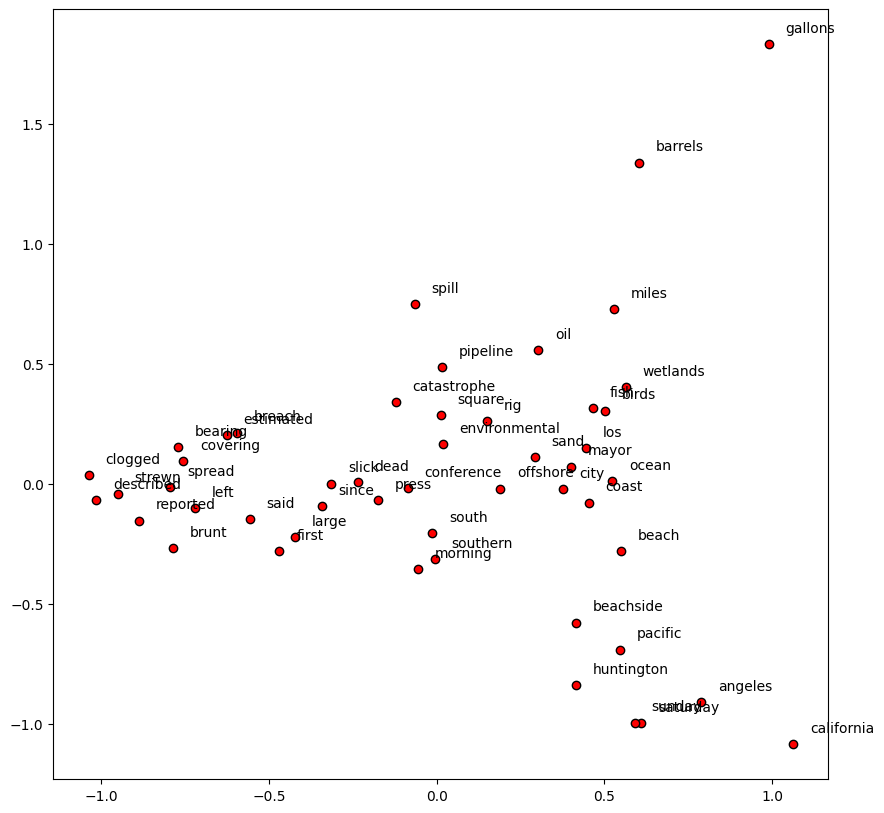

In [226]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
M2d_fasttext=PCA().fit_transform(mat3)[:,:2]
pd.DataFrame(M2d_fasttext).to_csv('M2d_fasttext.csv',header=False, index=False )
plt.figure(figsize=(10,10))
plt.scatter(M2d_fasttext[:,0], M2d_fasttext[:,1], edgecolors='k', c='r')
for word, (x,y) in zip(unique_f, M2d_fasttext):
    plt.text(x+0.05, y+0.05, word)
plt.savefig('figQ1p7_(5)')

Problem 8
*Compare the performance of word2vec, GLOVE, fastText using the plots from parts (5), (6), and (7)
by considering the following questions: what words cluster together? What words were not clustered
together but you think should have?*

wordvec: For this plot you see the goruping of the 'beachy' words that are pretty close together. Also barrel and gallon are grouped really close. I am surprised where california is. I thought it would be closer to beach or ocean. I also expected los angeles to be group closer. 

Glove: THis is more of what I expected. Again, barrel and gallon are close. Now oil and pipline are closer to these words which makes sense. The 'beach' terms are agian close togher but some surprised me like how far pacific is from ocean. I thought that would have closer distance. I also think it is weird that clogged was grouped next to ocean birds and fish. I dont think that one matches. I feel like this shows good grouping on the outside/obvious ones but gets a little ambigous for those middle groupings of words.

fasttext: I think this way has the best grouping. you can see the the progression from each word to the next. for example the line of how california to angeles to pacific to beachside to beach and to coast and so forth all the way up to miles and even gallons. You can also follow the split of words going from beachside to south to large to and over to clogged. I am little surprised at where sunday is grouped (with some of those beach terms) and maybe thought it would be closer to morning than it is.
 

Problem 2

Part a

In [16]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
import numpy as np
from collections import Counter



doc1 =  'This is reproducible result. Setting seed is helpful.'
doc2 = 'This result is not helpful.'
docs = [doc1,doc2]



def co_occurance(docs,k=2):
    from collections import Counter
    tokens = []
    allwrds = []
    tokenizer = RegexpTokenizer(r'[A-Za-z]+')
    for i in range(0,len(docs)):
        sentdoc = sent_tokenize(docs[i])
        for ii in range(0,len(sentdoc)):
            wrdlist = tokenizer.tokenize(sentdoc[ii])
            lowerwrd = [wrd.lower() for wrd in wrdlist]
            for word in lowerwrd:
                allwrds.append(word)
                if word not in tokens:
                    tokens.append(word)
    tokens.sort()
    
    #get most common words < 200
    counter = Counter(allwrds)
    mostcommon = counter.most_common()
    new_allwrds = []
    for i in mostcommon:
        new_allwrds.append(i[0])
    mostcommonwords = new_allwrds[:2000]
    mostcommonwords.sort()
   
    #create the diction of key and index
    wordind = {}
    count = 0
    for wrd in mostcommonwords:
        wordind[wrd] = count 
        count = count+1
    #create the m matrix
    import numpy as np
    from scipy.sparse import csc_matrix
    from sklearn.feature_extraction.text import CountVectorizer
    M = np.zeros((len(mostcommonwords),len(mostcommonwords)))
    for i in range(0,len(docs)):
        sentdoc = sent_tokenize(docs[i])
        for ii in range(0,len(sentdoc)):
            index = 0
            wrdlist = tokenizer.tokenize(sentdoc[ii])
            lowerwrd = [wrd.lower() for wrd in wrdlist]
            for wrd in lowerwrd:
                ind_list = []
                for ind in range(1,(k+1)):
                    ind_list.append(index-ind)
                    ind_list.append(index+ind)
                ind_list.sort()
                ind_l2 = [lwr for lwr in ind_list if lwr >= 0 and lwr < len(lowerwrd)]
                for ll in ind_l2:
                    if wrd in mostcommonwords and lowerwrd[ll] in mostcommonwords:
                        M[wordind[wrd],wordind[lowerwrd[ll]]] =  M[wordind[wrd],wordind[lowerwrd[ll]]]+1
                index = index + 1
    return M,wordind

co_mat, co_ind = co_occurance(docs,k=2)
co_mat

array([[0., 2., 1., 0., 0., 1., 0., 0.],
       [2., 0., 1., 1., 2., 1., 1., 2.],
       [1., 1., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1.],
       [0., 2., 1., 1., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 2., 0., 1., 1., 0., 0., 0.]])

In [17]:


def co_occurrence(sentences, window_size):
    from collections import defaultdict
    d = defaultdict(int)
    vocab = set()
    
    for text in sentences:
        # preprocessing (use tokenizer instead)
        tokenizer = RegexpTokenizer(r'[A-Za-z]+')
        text = tokenizer.tokenize(text.lower())
        # iterate over sentences
        for i in range(len(text)):
            token = text[i]
            vocab.add(token)  # add to vocab
            next_token = text[i+1 : i+1+window_size]
            for t in next_token:
                key = tuple( sorted([t, token]) )
                d[key] += 1
    
    # formulate the dictionary into dataframe
    vocab = sorted(vocab) # sort vocab
    df = pd.DataFrame(data=np.zeros((len(vocab), len(vocab)), dtype=np.int16),
                      index=vocab,
                      columns=vocab)
    for key, value in d.items():
        df.at[key[0], key[1]] = value
        df.at[key[1], key[0]] = value
    return df

print(co_occurrence(docs, window_size=2))





              helpful  is  not  reproducible  result  seed  setting  this
helpful             0   2    1             0       0     1        0     0
is                  2   0    1             1       2     1        1     2
not                 1   1    0             0       1     0        0     0
reproducible        0   1    0             0       1     0        1     1
result              0   2    1             1       0     1        1     1
seed                1   1    0             0       1     0        1     0
setting             0   1    0             1       1     1        0     0
this                0   2    0             1       1     0        0     0


Problem 2 part b

In [18]:
def SVD_embedding(M, m=2):
    from sklearn.decomposition import TruncatedSVD
    svd = TruncatedSVD(n_components=m)
    Tsvd = svd.fit_transform(M)
    return Tsvd
SVD_embedding(co_mat, m=2)

array([[ 1.69444516, -1.45463979],
       [ 3.13097349,  2.45697096],
       [ 1.35113514,  0.03784516],
       [ 1.39134292, -0.06440965],
       [ 2.12117342, -1.12887505],
       [ 1.09857002, -0.08786895],
       [ 0.8226602 , -0.70852139],
       [ 1.90116545, -1.11272762]])

Problem 2 part c

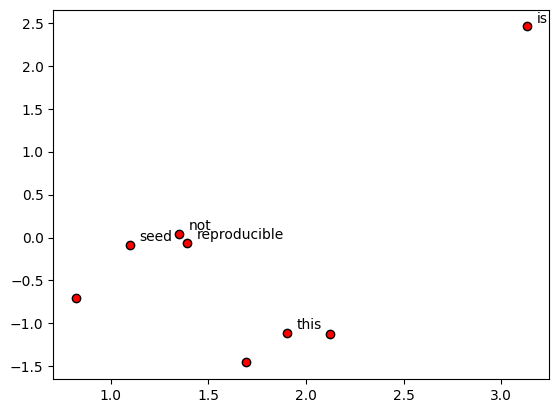

In [19]:
words = ['seed','not','reproducible','this','is']
def plot_embeddings(M_reduced,word2ind,words):
    import matplotlib.pyplot as plt
    ind = []        
    for wrd in words:
        ind.append(word2ind[wrd])
    mplot =(M_reduced[ind])
    plt.figure()
    plt.scatter(M_reduced[:,0], M_reduced[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, M_reduced[ind]):
        plt.text(x+0.05, y+0.05, word)

plot_embeddings(SVD_embedding(co_mat, m=2),co_ind,words)

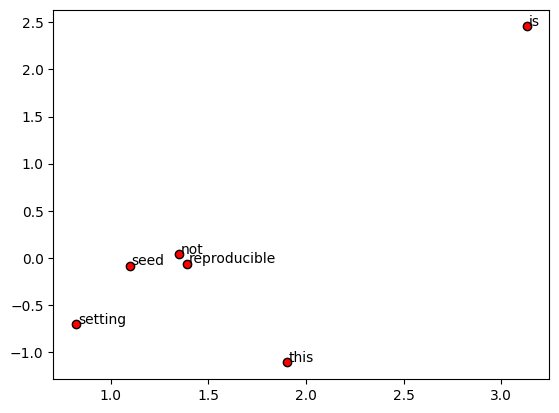

In [21]:
words = ['seed','not','reproducible','this','setting','is']
def plot_embeddings(M_reduced,word2ind,words):
    import matplotlib.pyplot as plt
    ind = []        
    for wrd in words:
        ind.append(word2ind[wrd])
    mplot =(M_reduced[ind])
    plt.figure()
    plt.scatter(mplot[:,0], mplot[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, M_reduced[ind]):
        plt.text(x+0.01, y+0.01, word)

plot_embeddings(SVD_embedding(co_mat, m=2),co_ind,words)

Problem 2 part d

In [22]:
import sqlite3
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from collections import Counter

wrdlist = ['covid', 'coronavirus', 'fever', 'sore', 'cough', 'deaths', 'unemployment', 'food', 'financial', 'jobs', 'market', 'airline',
'economy', 'digital', 'zoom', 'classes', 'violence', 'crime']


conn = sqlite3.connect('reuters_news_articles.sqlite')
cur = conn.cursor()
cur.execute('SELECT article FROM reuters_news WHERE INSTR(article, "coronavirus")>0')
reuters = cur.fetchall()
reutersstrlist = []
for i in range(0,len(reuters)):
    reutersstrlist.append(reuters[i][0])
doc1 =  'This is reproducible result. Setting seed is helpful.'
doc2 = 'This result is not helpful.'
docs = [doc1,doc2]


M, word2Ind = co_occurance(reutersstrlist, k=4)
M_reduced = SVD_embedding(M, m=2)
M_lengths = np.linalg.norm(M_reduced, axis=1)
M_normalized = M_reduced/M_lengths[:, np.newaxis]
#plot_embeddings(M_normalized, word2Ind, words)


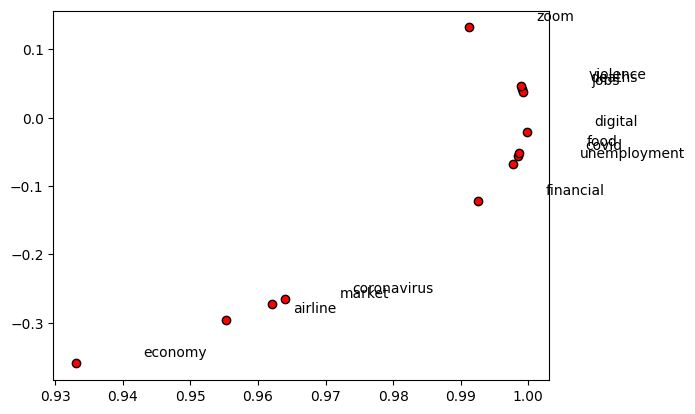

In [28]:
wrdlist = ['covid', 'coronavirus', 'deaths', 'unemployment', 'food', 'financial', 'jobs', 'market', 'airline',
'economy', 'digital', 'zoom', 'violence']
#I just removed the word each time is was not recognized
M_reduced = SVD_embedding(M, m=2)
M_lengths = np.linalg.norm(M_reduced, axis=1)
M_normalized = M_reduced/M_lengths[:, np.newaxis]
plot_embeddings(M_normalized, word2Ind, wrdlist)

Problem 3 part a

In [355]:
tokenizer = RegexpTokenizer(r'[a-z]+')
conn = sqlite3.connect('reuters_news_articles.sqlite')
cur = conn.cursor()
cur.execute('SELECT article FROM reuters_news WHERE INSTR(article, "coronavirus")>0')
reuters = cur.fetchall()
reutersstrlist = []
for i in range(0,len(reuters)):
    reutersstrlist.append(reuters[i][0])

reuterlower = [wrd.lower() for wrd in reutersstrlist]
lowerlist =' '.join(reuterlower)
tokenslist = tokenizer.tokenize(lowerlist)
tokensent =' '.join(tokenslist)

reutertxt = open('reuter.txt','w', encoding='UTF-8')
n = reutertxt.write(tokensent)
reutertxt.close()

import fasttext
file = 'reuter.txt'
model = fasttext.train_unsupervised(file,model = 'skipgram')




In [356]:
model.save_model('ques3fasttext.bin')
import fasttext
model = fasttext.load_model('ques3fasttext.bin')

Nearest for coronavirus

In [357]:
import pandas as pd
top10 = model.get_nearest_neighbors('coronavirus')
pd.DataFrame(top10).to_csv('nearest10 to coronavirus.csv',
header=False, index=False )
top10

[(0.8804031610488892, 'covid'),
 (0.8479735255241394, 'betacoronavirus'),
 (0.8228811621665955, 'coronaviruses'),
 (0.7936943173408508, 'pandemic'),
 (0.7887939214706421, 'outbreak'),
 (0.7877928018569946, 'novel'),
 (0.7766813039779663, 'disease'),
 (0.6969380378723145, 'amid'),
 (0.6754010915756226, 'virus'),
 (0.6694144606590271, 'amidst')]

Problem 3 part 2

In [359]:
from sklearn.metrics.pairwise import cosine_similarity
wordvectors = [model.get_word_vector(x) for x in ["covid", "fly", "flu", 'coronavirus']]
covid_fly = cosine_similarity([model['covid']],[model['fly']])
covid_flu = cosine_similarity([model['covid']],[model['flu']])
covid_rona = cosine_similarity([model['covid']],[model['coronavirus']])
fly_flu = cosine_similarity([model['fly']],[model['flu']])
fly_rona = cosine_similarity([model['fly']],[model['coronavirus']])
flu_rona = cosine_similarity([model['flu']],[model['coronavirus']])


# i assume this one
ques3_2 = {'sim_covid_coronavirus':covid_rona,'sim_flu_coronavirus':flu_rona,'sim_fly_coronavirus':fly_rona}
print(ques3_2)

{'sim_covid_coronavirus': array([[0.88040334]], dtype=float32), 'sim_flu_coronavirus': array([[0.39058045]], dtype=float32), 'sim_fly_coronavirus': array([[0.18235064]], dtype=float32)}


Problem 3 part c

{'airline': 0, 'classes': 1, 'coronavirus': 2, 'cough': 3, 'covid': 4, 'crime': 5, 'deaths': 6, 'digital': 7, 'economy': 8, 'fever': 9, 'financial': 10, 'food': 11, 'jobs': 12, 'market': 13, 'sore': 14, 'unemployment': 15, 'violence': 16, 'zoom': 17}


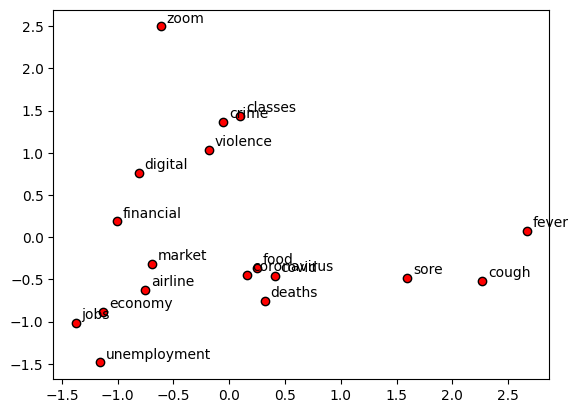

In [360]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


wrdlist = ['covid', 'coronavirus', 'fever', 'sore', 'cough', 'deaths', 'unemployment', 'food', 'financial', 'jobs', 'market', 'airline',
'economy', 'digital', 'zoom', 'classes', 'violence', 'crime']

wordvectors = np.empty((100,0))
word2ind = {}
count = 0
wrdlist.sort()
for wrd in wrdlist:
    wordvectors = np.c_[wordvectors, model[wrd]]
    word2ind[wrd] = count
    count = count + 1
wordvectors = np.transpose(wordvectors)


word2Ind_ques3 = word2ind

print(word2Ind_ques3)


M2d_fasttext_ques3=PCA().fit_transform(wordvectors)[:,:2]
pd.DataFrame(M2d_fasttext_ques3).to_csv('M2d_fasttext_ques3.csv',
header=False, index=False )

plt.scatter(M2d_fasttext_ques3[:,0], M2d_fasttext_ques3[:,1], edgecolors='k', c='r')
for word, (x,y) in zip(wrdlist, M2d_fasttext_ques3):
    plt.text(x+0.05, y+0.05, word)



Getting answer txt file

In [362]:

ques3_2_value_str = [str(value[0][0]) for value in ques3_2.values()]
ques3_2_dict = dict(zip(list(ques3_2.keys()), ques3_2_value_str))
answer = { 'ques1_4' : ques1_4, 'ques1_4_glove' : ques1_4_glove,
'ques1_4_fasttext' : ques1_4_fasttext, 'ques3_2': ques3_2_dict,
'word2Ind_ques3': word2Ind_ques3}
import json
answer_text = json.dumps(answer)
textfile = open('answer.txt', 'w')
textfile.write(answer_text )
textfile.close()

ques3_2_dict
print(answer['ques3_2'])

{'sim_covid_coronavirus': '0.88040334', 'sim_flu_coronavirus': '0.39058045', 'sim_fly_coronavirus': '0.18235064'}
